<a href="https://colab.research.google.com/github/hepaper3/edu_rest/blob/master/1_pandas_start_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 판다스 시작하기


## 1. 데이터 집합 불러오기


### 판다스 임포트

In [0]:
import pandas as pd

### gapminder.tsv를 df에 저장

In [0]:
df = pd.read_csv('gapminder.tsv', sep='\t')

* 본인 경로에 맞게 상대 경로로서 설정한다.
* gapminder는 스웨덴의 비영리 통계분석 서비스이다. 유엔의 데이터를 바탕으로 한 인구 예측, 부의 이동 등에 관한 연구논문과 통계정보를 공유한다. 

### head()를 사용하여 5개만 불러오기

In [0]:
print(df.____(5))

NameError: name 'df' is not defined

* head 파라미터로 숫자 바꿔 넣어보기

### df의 행과 열 개수 출력

In [0]:
print(df._____)

(1704, 6)


### df의 열 이름 확인하기

In [0]:
print(df.columns)

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


### 각 열의 데이터 타입 알아보기(dtypes, info())

* 판다스의 object 자료형 == 파이썬의 string 자료형

In [0]:
print(df.______)

AttributeError: 'DataFrame' object has no attribute '______'

## 2. 데이터 추출하기

In [0]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


### 행 단위로 데이터 추출하기

In [0]:
print(df.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


* 인덱스 : 위의 DataFrame에서 왼쪽의 번호가 인덱스이다. 숫자 대신 first, second, third 같은 문자열로 지정할 수도 있다.
* 행번호 : 데이터의 순서를 따라간다. 실제 데이터프레임 값에서 확인할 수 없으며 정수만으로 데이터를 조회한다.

#### (1) loc을 사용하여 인덱스 기준으로 행 데이터 추출하기

In [0]:
print(df.loc[0])
print('\n') # New Line, 엔터를 의미
print(df.loc[99])
print('\n')
print(df.loc[[0, 99, 999]]) # 인덱스 숫자 바꿔보기

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object


country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object


         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


In [0]:
# 마지막 행 추출하기 : 에러 발생
print(df.loc[-1]) 

KeyError: -1

In [0]:
# 에러가 나지 않게 마지막 행 추출하기 - 방법1
number_of_rows = df.shape[0]
last_row_index = number_of_rows - 1
print(df.loc[last_row_index])

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [0]:
# 에러가 나지 않게 마지막 행 추출하기 - 방법2
print(df.tail(1))

       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


#### (2) iloc을 사용하여 행번호 기준으로 행 데이터 추출하기

In [0]:
print(df.iloc[1])
print('\n')
print(df.iloc[99])

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object


country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object


In [0]:
print(df.iloc[-1]) # 음수를 사용해도 에러가 나지 않는다

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [0]:
# 여러 개의 데이터 한 번에 추출하기
print(df.iloc[[__, __, ___]])

ValueError: invalid literal for int() with base 10: ''

### 슬라이싱 구문, range 메서드

* 데이터의 행과 열을 지정하여 출력하려면 df.loc[[행], [열]] 또는 df.iloc[[행], [열]]로 추출합니다.

In [0]:
# 모든 행 데이터의 year, pop 열 추출하기. (loc사용시 문자열 리스트를 전달해야 함)
subset = df.loc[:, ['year', 'pop']]
print(subset.head())

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460


In [0]:
# 모든 행 데이터의 year, pop 열 추출하기. (iloc사용시 정수 리스트를 전달해야 함)
subset = df.iloc[:, [2,4]]
print(subset.head())

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460


* country,  gdpPercap 열 추출을 위해 loc와 iloc을 어떻게 사용해야할지 각자 해봅시다 :)

In [0]:
# 모든 행 데이터의  country, gdpPercap 열 추출하기

In [0]:
# 인덱스가 10인 행부터 13인 행의 country, lifeExp, gdfPercap 열 데이터 추출하기
subset = df.loc[10:13, ['country', 'lifeExp', 'gdpPercap']]
print(subset)

        country  lifeExp    gdpPercap
10  Afghanistan   42.129   726.734055
11  Afghanistan   43.828   974.580338
12      Albania   55.230  1601.056136
13      Albania   59.280  1942.284244


## 3. 기초 통계 계산하기

In [0]:
print(df.head(10))

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
5  Afghanistan      Asia  1977   38.438  14880372  786.113360
6  Afghanistan      Asia  1982   39.854  12881816  978.011439
7  Afghanistan      Asia  1987   40.822  13867957  852.395945
8  Afghanistan      Asia  1992   41.674  16317921  649.341395
9  Afghanistan      Asia  1997   41.763  22227415  635.341351


### lifeExp 열을 연도별로 그룹화하여 평균 계산하기

In [0]:
grouped_year_df_lifeExp = df.________('year')['lifeExp'].mean() # 앗 어렵다.. 의미를 이해하자
print(grouped_year_df_lifeExp)

AttributeError: 'DataFrame' object has no attribute '________'

### lifeExp, gdpPercap 열의 평균값을 연도, 지역별로 그룹화하여 한 번에 계산하기

In [0]:
multi_group_var = df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].______()
print(multi_group_var)

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


### 그룹화한 데이터 개수 세기 (빈도)

In [0]:
# continent로 그룹화하여 country 열만 추출해서 데이터 빈도수 계산
num_of_continent = df.groupby('continent')['country']._________()
print(num_of_continent)

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


## 4. 그래프 그리기

### 라이브러리 불러오기

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

* Matplotlib는 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지이다. 
* Matplotlib를 사용한 시각화 예제들을 보고 싶다면 Matplotlib 갤러리 웹사이트를 방문한다.
http://matplotlib.org/gallery.html

### year 열을 기준으로 그룹화한 데이터프레임에서 lifeExp 열만 추출하여 평균값 구하기

In [0]:
global_yearly_life_expectancy = df.groupby('year')['lifeExp'].mean()
print(global_yearly_life_expectancy)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


### plot 메서드를 사용하여 그래프 그리기

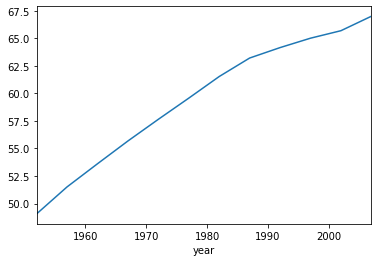

In [0]:
# 연도별 기대수명 그래프
global_yearly_life_expectancy.plot()